# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [45]:
#Data Loading and Preprocessing
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [46]:
#load data
def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)
    test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)
    return train_data, test_data

In [47]:
#cleaning text
def clean_text(review, stopword):
    wl = WordNetLemmatizer()
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)

In [48]:
#preprocess data
def preprocess_data(train_data, test_data):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stopword = stopwords.words('english')
    train_data['clean_reviews'] = train_data['reviews'].apply(clean_text, args=(stopword,))
    test_data['clean_reviews'] = test_data['reviews'].apply(clean_text, args=(stopword,))
    label_encoder = LabelEncoder()
    train_data['sentiment'] = label_encoder.fit_transform(train_data['sentiment'])
    test_data['sentiment'] = label_encoder.transform(test_data['sentiment'])
    return train_data, test_data

In [49]:
#tfidf_vectorization
def tfidf_vectorization(train_data, test_data):
  tfidf_vect = TfidfVectorizer()
  X_tfidf = tfidf_vect.fit_transform(train_data['clean_reviews'])
  X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
  X_test_tfidf = tfidf_vect.transform(test_data['clean_reviews'])
  return X_tfidf_df, X_test_tfidf

In [50]:
#evaluate all the models
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=10):
    print("Model: ", type(model).__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    print('Accuracy: {:.2f}%'.format(accuracy))
    print(classification_report(y_test, y_pred))

    scores = cross_val_score(model, X_test, y_test, cv=cv)
    print("Cross-Validation Mean Score: {:.2f}%".format(scores.mean() * 100))
    print("\n")

In [51]:
if __name__ == "__main__":
    train_file = 'stsa-train.txt'
    test_file = 'stsa-test.txt'

    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)
    X_tfidf_df, X_test_tfidf = tfidf_vectorization(train_data, test_data)

    models = [MultinomialNB(fit_prior=False), LinearSVC(), KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
              DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]                         #Models List

    for model in models:
        evaluate_model(model, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])   #Model Evaluation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model:  MultinomialNB
Accuracy: 81.11%
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       912
           1       0.78      0.86      0.82       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821

Cross-Validation Mean Score: 72.49%


Model:  LinearSVC
Accuracy: 79.63%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score: 70.84%


Model:  KNeighborsClassifier
Accuracy: 49.75%
              precision    recall  f1-score   support

           0       0.50      0.71      0.58       912
           1       0.49      0.29      0.

In [53]:
# Word2Vec
import gensim
from gensim.models import Word2Vec
import torch
import numpy as np

# Training Word2Vec model
tokenized_reviews = [review.split() for review in train_data['clean_reviews']]
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Function for word vectors for a document
def word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in model.wv.key_to_index:  # Updated access to vocabulary
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Vectorizing train and test data using Word2Vec
num_features = 100
train_data['word2vec_features'] = train_data['clean_reviews'].apply(
    lambda x: word_vectors(x, word2vec_model, num_features)
)
test_data['word2vec_features'] = test_data['clean_reviews'].apply(
    lambda x: word_vectors(x, word2vec_model, num_features)
)

In [54]:
from sklearn.svm import SVC
# Model training and evaluation with Word2Vec using SVM
svm_word2vec = SVC()
evaluate_model(svm_word2vec, np.vstack(train_data['word2vec_features']), train_data['sentiment'],
               np.vstack(test_data['word2vec_features']), test_data['sentiment'])

Model:  SVC
Accuracy: 50.85%
              precision    recall  f1-score   support

           0       0.58      0.07      0.12       912
           1       0.50      0.95      0.66       909

    accuracy                           0.51      1821
   macro avg       0.54      0.51      0.39      1821
weighted avg       0.54      0.51      0.39      1821

Cross-Validation Mean Score: 51.95%




In [55]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [56]:
pip install transformers

In [57]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
# Function to generate BERT embeddings for text
def generate_bert_embeddings(text):
    tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [58]:
# function to your clean  data
train_data['bert_embeddings'] = train_data['clean_reviews'].apply(generate_bert_embeddings)
test_data['bert_embeddings'] = test_data['clean_reviews'].apply(generate_bert_embeddings)
# Display BERT embeddings for the first training sample
print("BERT Embeddings for the First Training Sample:")
print(train_data['bert_embeddings'].iloc[0])

BERT Embeddings for the First Training Sample:
[-1.40036151e-01  3.55117805e-02  2.13999808e-01 -6.65000454e-02
  4.71104950e-01 -7.52719194e-02  3.07842910e-01 -8.16104710e-02
 -2.64929682e-01 -2.83197403e-01  2.91915447e-01 -2.10371628e-01
  2.46222243e-01  5.01004577e-01 -1.93359241e-01  3.99349689e-01
 -6.71940967e-02 -1.82531834e-01 -3.81843261e-02  1.44969895e-01
 -5.36905006e-02 -1.42853081e-01 -5.47963567e-02  2.33093828e-01
  1.04806267e-01 -2.09600419e-01 -9.51560438e-02  1.38024315e-01
 -3.71773452e-01  1.53841898e-01 -5.12005668e-03 -1.99296698e-01
 -2.53173053e-01  4.96442802e-02  4.81599346e-02 -3.59166443e-01
 -2.68733650e-01 -1.81531578e-01 -1.72955985e-03  3.47850956e-02
 -5.44842780e-01 -2.31957257e-01  5.10981500e-01 -2.59197634e-02
 -4.52730030e-01 -2.95796841e-01 -1.97576731e-01 -1.37414664e-01
  5.75045832e-02 -2.69117475e-01  1.16129950e-01  2.28477001e-01
 -1.46899551e-01 -1.63072929e-01 -8.16041455e-02  6.55950546e-01
 -1.55862525e-01 -5.08638740e-01 -8.5641108

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [59]:
# importing the libraries
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
data_df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [61]:
#datashape
print("Shape: {0}".format(data_df.shape))

Shape: (413840, 6)


In [62]:
#printing cluster data
cluster_data_df = data_df.head(1000)
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0


In [63]:
# Special characters removal
cluster_data_df['After noise removal'] = cluster_data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
# Punctuation removal
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]','')
# Remove numbers
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')
# Stopwords removal
stop_word = stopwords.words('english')
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
# Lower Casing
cluster_data_df['Lower casing'] = cluster_data_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Tokenization
cluster_data_df['Tokenization'] = cluster_data_df['Lower casing'].apply(lambda x: TextBlob(x).words)
# Stemming
st = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))
# Lemmatization
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It decent price I one 6 months The cons 1 I pr...,it decent price i one 6 months the cons 1 i pr...,"[it, decent, price, i, one, 6, months, the, co...",it decent price i one 6 month the con 1 i pret...,it decent price i one 6 month the con 1 i pret...
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0,Is good cell phone,Is good cell phone,Is good cell phone,Is good cell phone,is good cell phone,"[is, good, cell, phone]",is good cell phone,is good cell phone
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables case included also screen...,amazing phone cables case included also screen...,"[amazing, phone, cables, case, included, also,...",amaz phone cabl case includ also screen pritec...,amaz phone cabl case includ also screen pritec...
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0,Excelent,Excelent,Excelent,Excelent,excelent,[excelent],excel,excel


In [64]:
#kmeans clustering using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape

(1000, 2620)

In [65]:
#kmeans
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters=10, random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=10, random_state=99)

In [66]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00097592, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
terms1 = tfidf_vect.get_feature_names_out()
terms1[1:10]

array(['00pm', '03', '04', '0mp', '10', '100', '1080p', '10k', '11'],
      dtype=object)

In [68]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.08369201619296456

In [69]:
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,5
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,5
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,4
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,5


In [70]:
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     32
1    384
2     35
3     51
4     61
5    255
6     59
7     59
8     21
9     43
Name: Reviews, dtype: int64

In [71]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: arriv
 return
 dead
 wast
 product
 work
 thi
 phone
 disappoint
 condit
Cluster 1: work
 phone
 it
 bad
 good
 like
 bueno
 use
 well
 fine
Cluster 2: excelent
 telefono
 bueno
 muy
 producto
 far
 fastest
 faster
 fast
 fashion
Cluster 3: excel
 product
 recommend
 seller
 thank
 100
 phone
 fash
 function
 five
Cluster 4: good
 veri
 phone
 product
 price
 buy
 tank
 thank
 mobil
 recomend
Cluster 5: phone
 use
 work
 the
 it
 card
 sim
 would
 one
 thi
Cluster 6: love
 phone
 it
 best
 like
 screen
 buy
 price
 camera
 good
Cluster 7: great
 phone
 work
 easi
 use
 love
 expect
 good
 thi
 price
Cluster 8: ok
 far
 wcdma
 it
 quit
 peopl
 someon
 buy
 slow
 phone
Cluster 9: the
 horribl
 phone
 work
 item
 overal
 pictur
 good
 never
 take


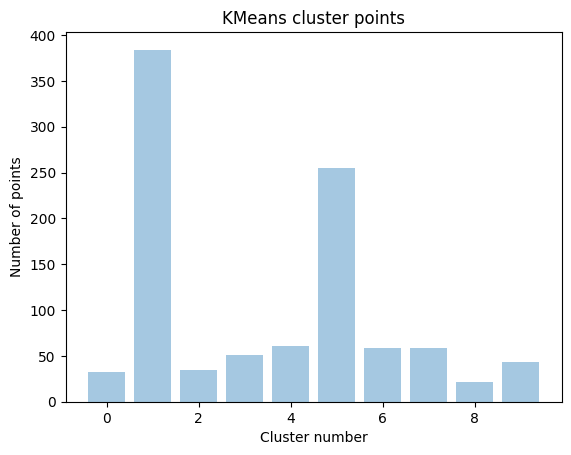

In [72]:
#k-Means cluster
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [73]:
# Reading a review which belong to each group.
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
Great. Arrived quickly.


The package arrived on time and in good condition. It not covers all my expectations, but is functional for me.


Attractive phone but did not work upon arrival. I would not recommend.


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
Very pleased


These guys are the best! I had a little situation with my item but they quickly fixed the issue. I was pleased and will definitely be buying another phon from them if I need one.


Perfect in every way.


______________________________________________________________________
4 review of assigned to cluster  2
----------------------------------------------------------------------
excelente


Excelente


excelente


______________________________________________________________________


In [74]:
#Kmeans other method
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['Reviews'].values)
bow.shape

(1000, 3455)

In [75]:
from sklearn.cluster import KMeans
from sklearn import metrics
# Assuming  that KMeans model and obtained cluster labels
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(bow)
labels = kmeans_model.labels_
# Calculate the silhouette score
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.39312119272928114


In [76]:
cluster_data_df['Bow Clus Label'] = kmeans_model.labels_ # the last column you can see the label numebers
cluster_data_df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,5,8
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,5,0


In [77]:
#DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
# Define the minimum number of points required to form a dense region
minPts = 2 * 100
# Lower bound function to find the 200th nearest neighbor distance
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
# Function to compute the 200th nearest neighbor distance
def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) ** 2)
        if (len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[199]

In [78]:
# training data by splitting the text into sentences
list_of_sent_train = list()
for i in cluster_data_df["Lower casing"].values:
    list_of_sent_train.append(i.split())
# Train a Word2Vec model on the training data
import gensim
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)
# Convert sentences into vectors using the trained Word2Vec model
sent_vectors = []
count = 1
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words = 1
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

In [79]:
# Compute the 200th nearest neighbor distance for each point in the dataset
twohundrethneigh = []
for val in sent_vectors[:300]:
    twohundrethneigh.append(compute200thnearestneighbour(val, sent_vectors[:300]) )
twohundrethneigh.sort()
# Train the DBSCAN clustering model
model = DBSCAN(eps=5, min_samples=minPts, n_jobs=-1)
model.fit(sent_vectors)
# Assign cluster labels to the data points
cluster_data_df.loc[:, 'AVG-W2V Clus Label'] = model.labels_

In [80]:
from sklearn.metrics import pairwise_distances
# Calculate pairwise distances between samples in the data
distances = pairwise_distances(sent_vectors)
# Sort the distances in ascending order
sorted_distances = np.sort(distances, axis=0)
# Get the 200th nearest neighbor distance for each point
twohundredth_nearest_distances = sorted_distances[:, 199]

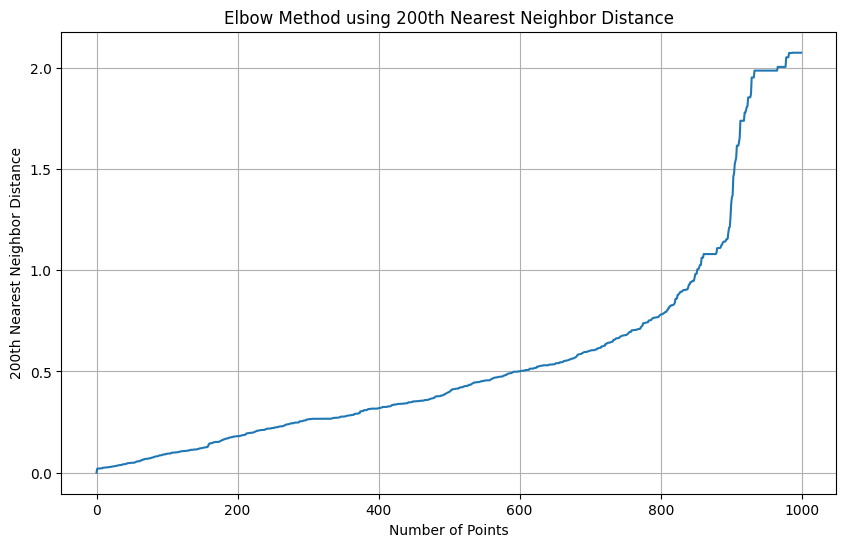

In [81]:
# Plot the elbow method graph using the 200th nearest neighbor distances
plt.figure(figsize=(10, 6))
plt.plot(twohundredth_nearest_distances)
plt.title("Elbow Method using 200th Nearest Neighbor Distance")
plt.xlabel("Number of Points")
plt.ylabel("200th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

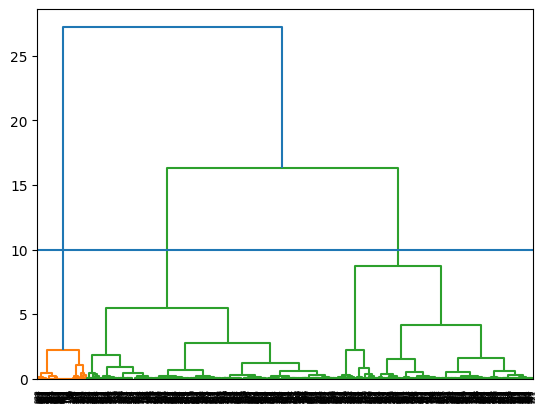

In [82]:
#Hierarchial Clustering
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


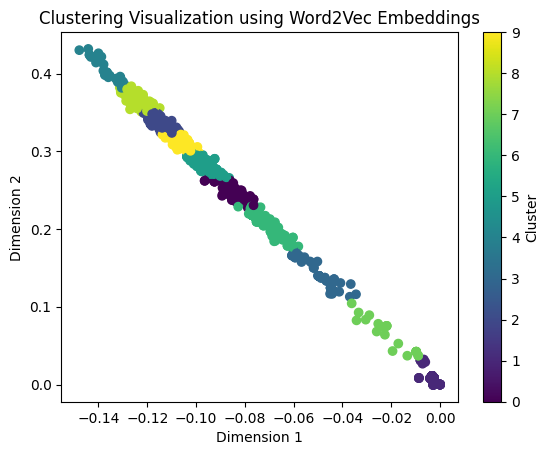

In [35]:
#Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(sent_vectors)
clusters = kmeans.predict(sent_vectors)
# Visualize the clustering results
plt.scatter(sent_vectors[:, 0], sent_vectors[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering Visualization using Word2Vec Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


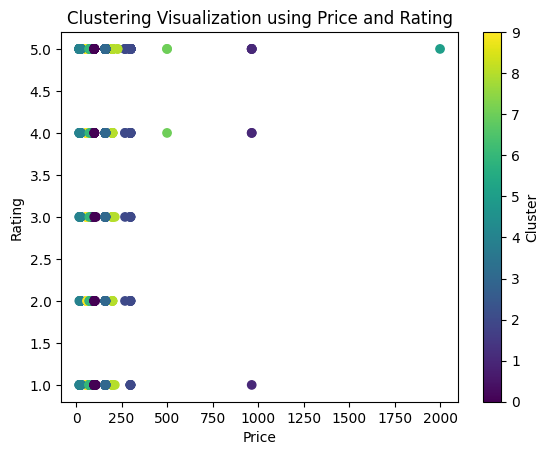

In [43]:
#BERT
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Prepare the data
X = cluster_data_df[['Price', 'Rating']]
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
clusters = kmeans.predict(X)
# Visualize the clustering results
plt.scatter(X['Price'], X['Rating'], c=clusters, cmap='viridis')
plt.title('Clustering Visualization using Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.colorbar(label='Cluster')
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




In [ ]:
'''
K-means clustering is based on the distance between the data points and the centroids of the clusters themselves. DBSCAN is
used to perform clustering that is based on density. Here the areas where the points are concetrated the most are found and are segregated
from empty space. Hierarchical clustering, as the name suggests involves clustering in layers. It begins with considering each data point
as a seperate cluster and then finds the two clusters that are closer to each other.'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [83]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
The exercises provided hands-on practice in data preprocessing, text cleaning, and model evaluation using techniques like Word2Vec, BERT, and RandomForestClassifier. Splitting the code into functions improved readability, while evaluating models using metrics like accuracy and classification reports helped understand model performance. Overall, the exercises offered valuable exposure to diverse NLP techniques and reinforced concepts effectively.




'''

'\nPlease write you answer here:\nThe exercises provided hands-on practice in data preprocessing, text cleaning, and model evaluation using techniques like Word2Vec, BERT, and RandomForestClassifier. Splitting the code into functions improved readability, while evaluating models using metrics like accuracy and classification reports helped understand model performance. Overall, the exercises offered valuable exposure to diverse NLP techniques and reinforced concepts effectively.\n\n\n\n\n'